### For a telecommunication Company, Predict when its customers will leave for a competitor, so that they can take some action to retain the customers.

### Customer Churn with Logistic Regression

### Importing Libraries

In [19]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import os
import seaborn as sns

#Setting the palette
sns.set_style('darkgrid')
sns.set_palette("Set3", 9)

Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.

In [7]:
churn = pd.read_csv('Telco-Customer-Churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
print('Customer Churn Rate', round(len(churn[churn['Churn'] == 'Yes'])/ len(churn) * 100,2))

Customer Churn Rate 26.54


In [ ]:
print("Customer Churn Rate", round(len(data[data["Churn"] == "Yes"])/len(data) * 100,2))

In [17]:
churn.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [10]:
churn.shape

(7043, 21)

In [11]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Checking unique values in the Dataset

In [15]:
# Printing the unique values if it is less than 10 otherwise just the count of unique values

for column in churn:
    unique_values = np.unique(churn[column])
    unique_no = len(unique_values)
    
    if unique_no < 10:
        print('The number of unique values for feature {} is {} -- {}'.format(column, unique_no, unique_values))
    else:
        print('The range for the feature {} is {} -- {}'.format(column, min(churn[column]), max(churn[column])))

The range for the feature customerID is 0002-ORFBO -- 9995-HOTOH
The number of unique values for feature gender is 2 -- ['Female' 'Male']
The number of unique values for feature SeniorCitizen is 2 -- [0 1]
The number of unique values for feature Partner is 2 -- ['No' 'Yes']
The number of unique values for feature Dependents is 2 -- ['No' 'Yes']
The range for the feature tenure is 0 -- 72
The number of unique values for feature PhoneService is 2 -- ['No' 'Yes']
The number of unique values for feature MultipleLines is 3 -- ['No' 'No phone service' 'Yes']
The number of unique values for feature InternetService is 3 -- ['DSL' 'Fiber optic' 'No']
The number of unique values for feature OnlineSecurity is 3 -- ['No' 'No internet service' 'Yes']
The number of unique values for feature OnlineBackup is 3 -- ['No' 'No internet service' 'Yes']
The number of unique values for feature DeviceProtection is 3 -- ['No' 'No internet service' 'Yes']
The number of unique values for feature TechSupport is 3

### Checking Missing Values

In [26]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<b>We have no missing values</b>

### Exploratory Data Analysis

In [22]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [24]:
churn['TotalCharges'].astype('float64')

ValueError: could not convert string to float: 

In [27]:
churn['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

#### Plotting Histogram for Numerical Variable and Count plot for categorical Variable

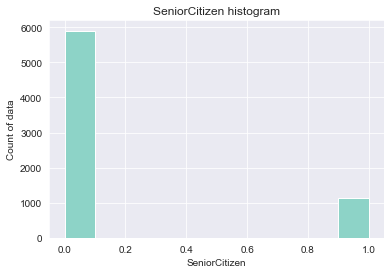

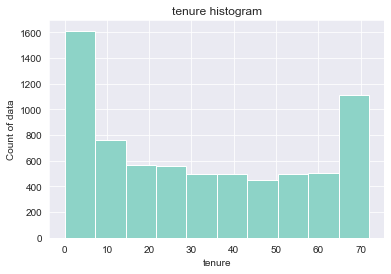

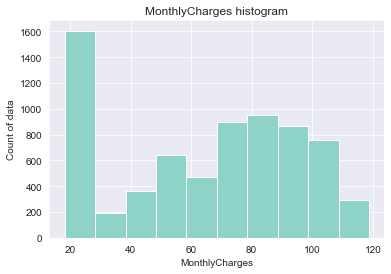

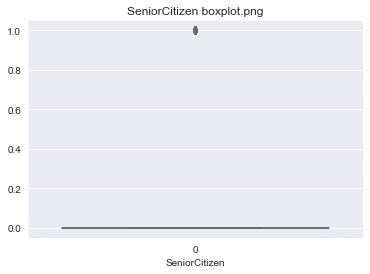

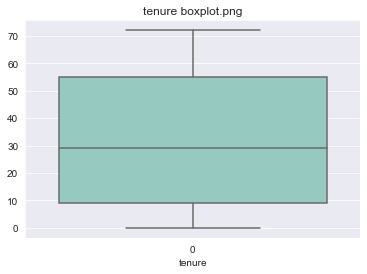

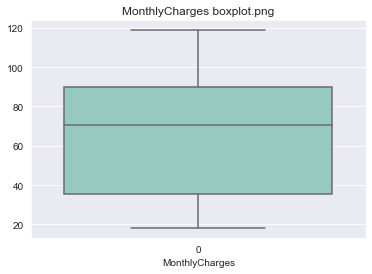

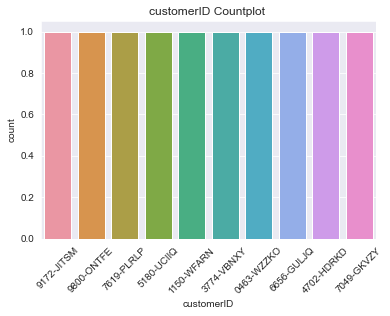

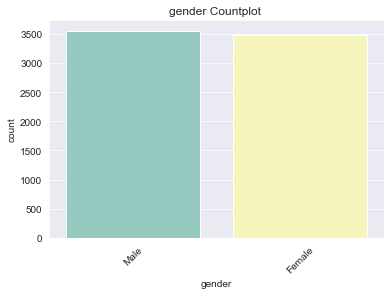

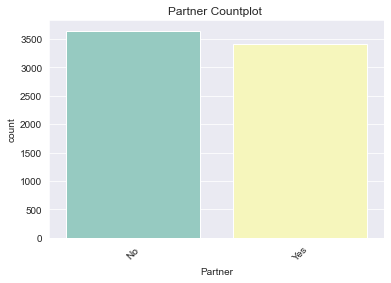

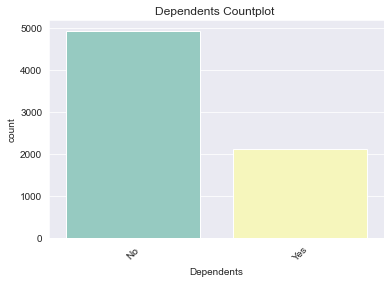

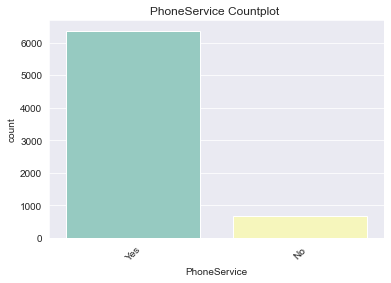

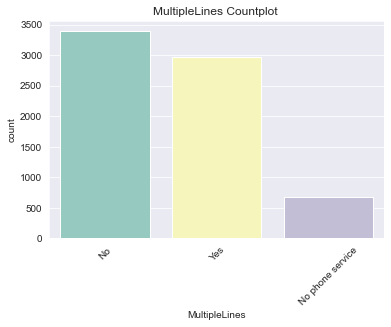

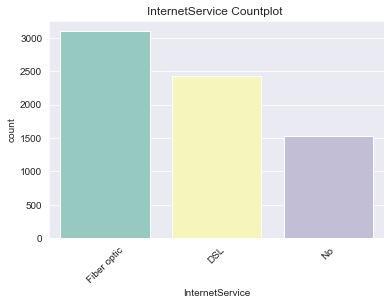

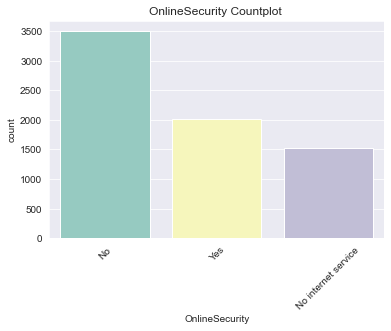

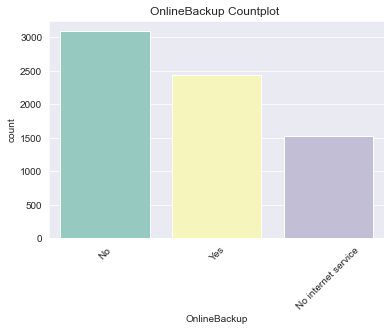

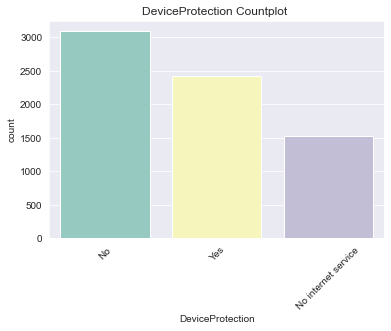

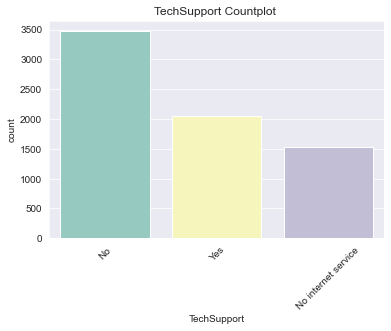

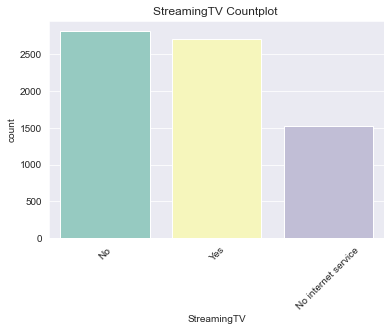

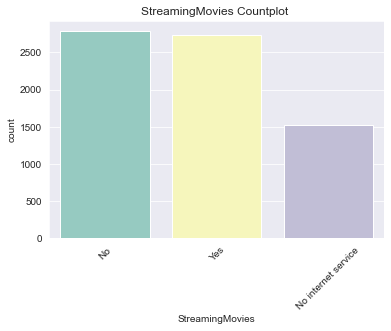

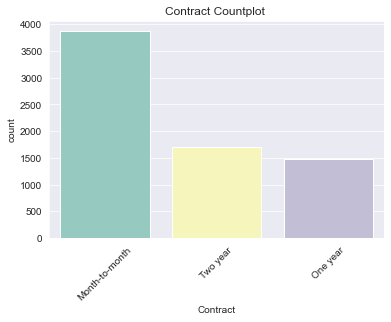

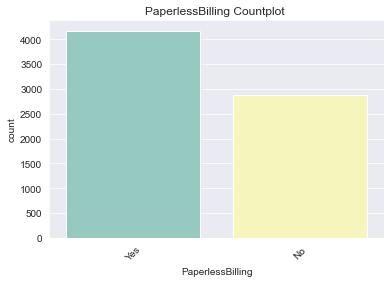

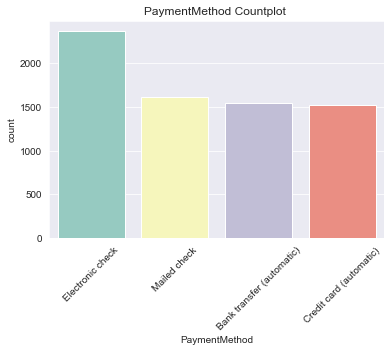

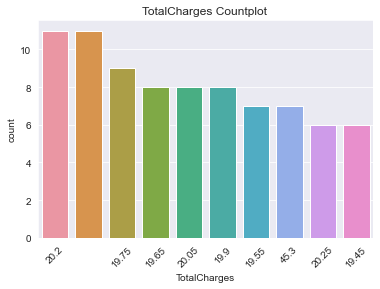

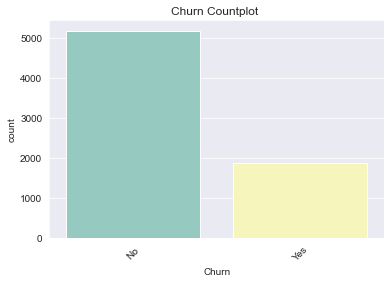

In [20]:
def graphs(dataframe):
    inttype = []
    objecttype = []
    for column in dataframe:
        columnObjectSeries = dataframe[column]
        if (columnObjectSeries.dtypes == 'int64') or (columnObjectSeries.dtypes == 'float64') :
            inttype.append(column)
        elif columnObjectSeries.dtypes == 'object':
            objecttype.append(column)
    
    numerical = dataframe[inttype] # New dataframe of numerical data
    categorical = dataframe[objecttype] # New dataframe of object type data
    
# Plotting Histogram for Numerical data    
    for column in numerical:
        plt.hist(numerical[column])
        plt.xlabel(column)
        plt.ylabel('Count of data')
        plt.title('{} histogram'.format(column))
        #plt.savefig('{} histogram.png'.format(column))
        plt.show()
        
# Plotting box plot for Numerical data
    for column in numerical:
        sns.boxplot(data = numerical[column])
        #plt.savefig('{} boxplot.png'.format(column))
        plt.xlabel(column)
        plt.title('{} boxplot.png'.format(column))
        plt.show()
    
# Plotting bar chart for all categorical data
    for column in categorical:
            sns.countplot(data = categorical, x = column, order=pd.value_counts(dataframe[column]).iloc[:10].index)
            plt.xticks(rotation=45)
            plt.xlabel(column)
            plt.title("{} Countplot ".format(column))
            #plt.savefig('{} countplot.png'.format(column))
            plt.show()
graphs(churn)


### Duplicate Values

In [34]:
churn_df = churn_df[['tenure','Dependents', 'MultipleLines', 'InternetService', 'PhoneService', 'PaymentMethod', 'TotalCharges', 'Contract',  'StreamingTV', 'OnlineBackup','Churn']]
# churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

In [35]:
print(f'Shape before dropping duplicates {churn_df.shape}')
churn_df = churn_df.drop_duplicates()
print(f'Shape after dropping duplicates {churn_df.shape}')

Shape before dropping duplicates (7043, 11)
Shape after dropping duplicates (6964, 11)
